In [1]:
import json
import numpy
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [34]:
from gluoncv import model_zoo, data, utils
import random
import sys
import cv2

from data_aug.data_aug import *
from data_aug.bbox_util import *

In [2]:
inst_train_path = "/home/ubuntu/data/annotations/instances_train2017.json"
inst_train  = json.loads(open(inst_train_path).read())
inst_train.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [3]:
inst_train['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [4]:
inst_train['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [5]:
inst_train['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [6]:
captions_train_path = "/home/ubuntu/data/annotations/captions_train2017.json"
captions_val_path = "/home/ubuntu/data/annotations/captions_val2017.json"
inst_train_path = "/home/ubuntu/data/annotations/instances_train2017.json"
inst_val_path = "/home/ubuntu/data/annotations/instances_val2017.json"

In [7]:
def merge_image_info(captions_path, inst_path):
    captions  = json.loads(open(captions_path).read())
    inst  = json.loads(open(inst_path).read())
    image_df = pd.DataFrame(inst['images'])
    annotation_df = pd.DataFrame(inst['annotations'])
    #the 'id' in image_df needs to be changed to 'image_id' in order to join with annotations_df
    renamed_image_df = image_df.copy(deep=True)
    renamed_image_df.rename(columns={'id':'image_id'}, inplace=True)
    images_and_annotations_df = annotation_df.merge(renamed_image_df,on='image_id', how='left')
    #electronics_only_merged_df = images_and_annotations_df.loc[(images_and_annotations_df['category_id'] >= 72) & (images_and_annotations_df['category_id'] <= 77)]
    
    #select all images that contain electronics
    #all_images_with_electronics = list(pd.Series(electronics_only_merged_df['image_id']).unique())
    
    #return(electronics_only_merged_df)
    return(images_and_annotations_df)

In [47]:
train_info = merge_image_info(captions_train_path, inst_train_path)
val_info = merge_image_info(captions_val_path, inst_val_path)

In [9]:
train_info.head()#add in actual label name

,area,bbox,category_id,id,image_id,iscrowd,segmentation,coco_url,date_captured,file_name,flickr_url,height,license,width
0,2765.14865,"[199.84, 200.46, 77.71, 70.88]",58,156,558840,0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",http://images.cocodataset.org/train2017/000000...,2013-11-15 06:55:40,000000558840.jpg,http://farm5.staticflickr.com/4045/4488509035_...,427,1,640
1,1545.42130,"[234.22, 317.11, 149.39, 38.55]",58,509,200365,0,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",http://images.cocodataset.org/train2017/000000...,2013-11-15 00:04:50,000000200365.jpg,http://farm2.staticflickr.com/1177/1162747961_...,480,3,640
2,5607.66135,"[239.48, 347.87, 160.0, 57.81]",58,603,200365,0,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402....",http://images.cocodataset.org/train2017/000000...,2013-11-15 00:04:50,000000200365.jpg,http://farm2.staticflickr.com/1177/1162747961_...,480,3,640
3,0.00000,"[296.65, 388.33, 1.03, 0.0]",58,918,200365,0,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388....",http://images.cocodataset.org/train2017/000000...,2013-11-15 00:04:50,000000200365.jpg,http://farm2.staticflickr.com/1177/1162747961_...,480,3,640
4,800.41325,"[251.87, 333.42, 125.94, 22.71]",58,1072,200365,0,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335....",http://images.cocodataset.org/train2017/000000...,2013-11-15 00:04:50,000000200365.jpg,http://farm2.staticflickr.com/1177/1162747961_...,480,3,640


In [12]:
len(train_info)

860001

In [13]:
for blah in range(1):
    print(blah)

0


In [15]:
train_info.loc[0,:]

area                                                       2765.15
bbox                                [199.84, 200.46, 77.71, 70.88]
category_id                                                     58
id                                                             156
image_id                                                    558840
iscrowd                                                          0
segmentation     [[239.97, 260.24, 222.04, 270.49, 199.84, 253....
coco_url         http://images.cocodataset.org/train2017/000000...
date_captured                                  2013-11-15 06:55:40
file_name                                         000000558840.jpg
flickr_url       http://farm5.staticflickr.com/4045/4488509035_...
height                                                         427
license                                                          1
width                                                          640
Name: 0, dtype: object

In [16]:
train_info.loc[0,:]['image_id']

558840

In [17]:
train_folder_name = '/home/ubuntu/data/train2017/'
all_train_filenames = os.listdir(train_folder_name)
max_file_id_length = len(all_train_filenames[0]) - 4

In [19]:
files_to_open = []
for image_id in train_info['image_id']:
    file_id = str(image_id)
    zeros_to_add = max_file_id_length-len(file_id)
    filename = ('0'*zeros_to_add) + file_id + '.jpg'
    files_to_open.append(filename)

In [24]:
file_name = train_folder_name + files_to_open[0]

In [28]:
file_name

'/home/ubuntu/data/train2017/000000558840.jpg'

In [29]:
file_name = train_folder_name + '000000' + str(train_info.loc[0,:]['image_id']) + '.jpg'
file_name

'/home/ubuntu/data/train2017/000000558840.jpg'

In [25]:
x, img = data.transforms.presets.ssd.load_test(file_name, short=512)

In [26]:
x.shape

(1, 3, 512, 767)

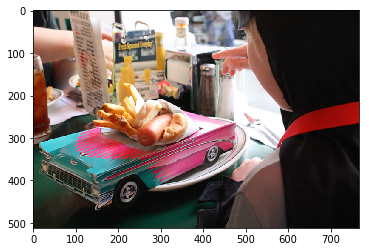

In [27]:
ax = utils.viz.plot_image(img)
plt.show()

In [68]:
b_box_test = train_info.loc[0,:]['bbox'].copy()
b_box_test

[199.84, 200.46, 77.71, 70.88]

In [65]:
bbox_class = train_info.loc[0,:]['category_id']

In [66]:
b_box_test.append(bbox_class)
np.array(b_box_test)

array([199.84, 200.46,  77.71,  70.88,  58.  ])

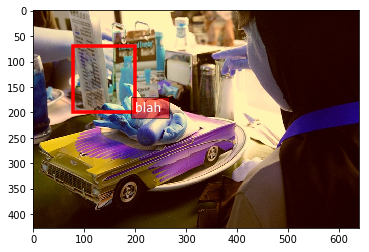

In [69]:
ax = utils.viz.plot_bbox(img, np.array([b_box_test]), labels=np.array([0]), class_names=['blah'])
plt.show()

In [ ]:
#current b_box format: [xmin, ymin, xmax, ymax]
#need to convert bbox format to [top left x, top left y, bottom right x, bottom right y, class]
#want [xmin, ymax, xmax, ymin]

In [51]:
img = cv2.imread(file_name)[:,:,::-1]
bboxes = np.array([b_box_test])
print(bboxes)

[[199.84 200.46  77.71  70.88  58.  ]]


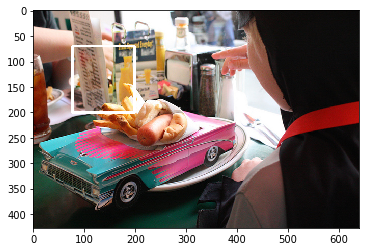

In [52]:
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()

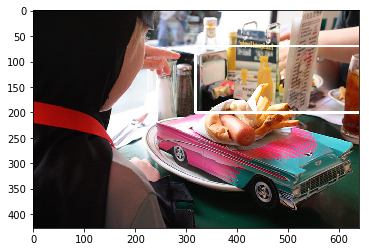

In [53]:
img_, bboxes_ = RandomHorizontalFlip(1)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

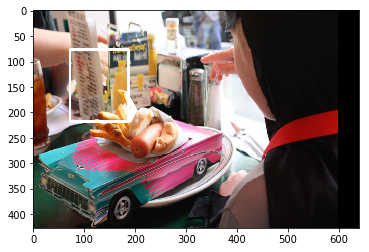

In [54]:
img_, bboxes_ = RandomScale(0.3, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

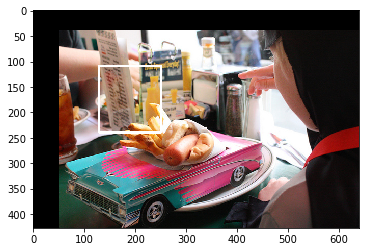

In [55]:
img_, bboxes_ = RandomTranslate(0.3, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

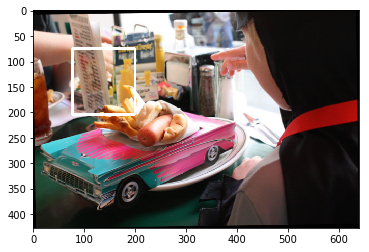

In [56]:
img_, bboxes_ = RandomRotate(20)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

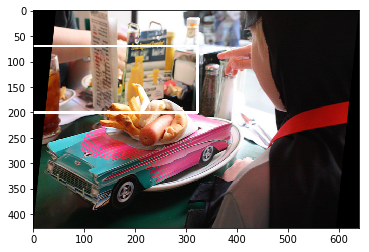

In [57]:
img_, bboxes_ = RandomShear(0.2)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

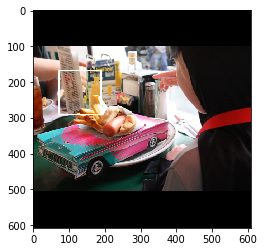

In [58]:
img_, bboxes_ = Resize(608)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

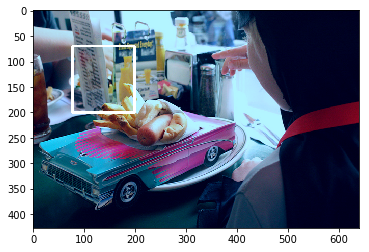

In [59]:
img_, bboxes_ = RandomHSV(100, 100, 100)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

In [62]:
cv2.imwrite('/home/ubuntu/test_save.jpg', img_)

True

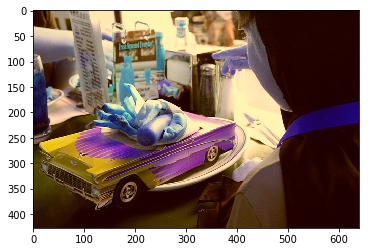

In [63]:
img = cv2.imread('/home/ubuntu/test_save.jpg')[:,:,::-1]
plt.imshow(img)
plt.show()